In [1]:
%matplotlib inline
#import find_motifs as fdm
from scipy import stats
import copy
import networkx as nx
from collections import Counter
from math import sqrt
from matplotlib.pyplot import MultipleLocator
from statistics import mean
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import time
import math
import json
import csv
import os
import shutil
import seaborn as sns
import numpy as np
import pandas as pd
import tempfile
# from pandas.io.json import json_normalize
from pandas.core.frame import DataFrame
import networkx as nx
from collections import deque
# 忽略警告
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from sklearn import preprocessing
from sklearn.utils import shuffle
# from sklearn.metrics import plot_confusion_matrix
lbl = preprocessing.LabelEncoder()
import xgboost as xgb

In [4]:
count = 0
# list_h = [30,60,120,180,240,300,450,900,1800,3600,7200,10800, 36000, 72000, 98000, 144000, 180000, 216000, 252000]#1h到9h
list_h = [0, 360, 720, 1080, 1440, 1800, 2160, 2520, 2880, 3240, 3600, 3960, 4320, 4680, 5040, 5400, 5760, 6120, 6480, 6840, 7200] #1h到9h

for b in list_h:
    count = count + 1
    print(count)
    path6 = 'G:/大论文/微博/新数据集/real/'
    path_list6=os.listdir(path6)
    list2 = []
    for filename in path_list6:
        path_csv6 = os.path.join(path6,filename)
        df1 = pd.read_csv(path_csv6)
        df = df1[1:]
        df = df[df['时刻'] <= b]
        G = nx.from_pandas_edgelist(df, 'parent', 'mid' ,create_using=nx.DiGraph())
        if G.number_of_nodes() == 0:
            continue
        max_width = max([len(list(G.neighbors(node))) for node in G.nodes()]) - 1
        list2.append([filename[1:-4],
                          motif3_1(G), motif3_2(G), 
                          motif4_1(G), motif4_2(G), 
                          motif4_3(G), motif4_4(G),
                          motif5_1(G), motif5_2(G), 
                          motif5_3(G), motif5_4(G), 
                          motif5_5(G), motif5_6(G), 
                          motif5_7(G), motif5_8(G), motif5_9(G)])
        
        name = ['id', 'm3_1', 'm3_2', 'm4_1', 'm4_2', 'm4_3', 'm4_4',
                        'm5_1', 'm5_2', 'm5_3', 'm5_4', 'm5_5', 'm5_6', 'm5_7', 'm5_8', 'm5_9']
        test1 = pd.DataFrame(columns = name, data = list2)
        test1.to_csv('F:/小论文/weibo前2小时的模体分布/real/'+str(b)+'.csv', encoding='utf-8')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [ ]:
count = 0
# list_h = [30,60,120,180,240,300,450,900,1800,3600,7200,10800, 36000, 72000, 98000, 144000, 180000, 216000, 252000]#1h到9h
list_h = [360, 720, 1080, 1440, 1800, 2160, 2520, 2880, 3240, 3600, 3960, 4320, 4680, 5040, 5400, 5760, 6120, 6480, 6840, 7200] #1h到9h

for b in list_h:
    count = count + 1
    print(count)
    path6 = 'G:/大论文/微博/新数据集/real/'
    path_list6=os.listdir(path6)
    list2 = []
    for filename in path_list6:
        path_csv6 = os.path.join(path6,filename)
        df1 = pd.read_csv(path_csv6)
        df = df1[1:]
        df = df[df['时刻'] <= b]
        G = nx.from_pandas_edgelist(df, 'parent', 'mid' ,create_using=nx.DiGraph())
        if G.number_of_nodes() == 0:
            continue
        max_width = max([len(list(G.neighbors(node))) for node in G.nodes()]) - 1
        list2.append([filename[1:-4],
                          motif3_1(G), motif3_2(G), 
                          motif4_1(G), motif4_2(G), 
                          motif4_3(G), motif4_4(G),
                          motif5_1(G), motif5_2(G), 
                          motif5_3(G), motif5_4(G), 
                          motif5_5(G), motif5_6(G), 
                          motif5_7(G), motif5_8(G), motif5_9(G)])
        
        name = ['id', 'm3_1', 'm3_2', 'm4_1', 'm4_2', 'm4_3', 'm4_4',
                        'm5_1', 'm5_2', 'm5_3', 'm5_4', 'm5_5', 'm5_6', 'm5_7', 'm5_8', 'm5_9']
        test1 = pd.DataFrame(columns = name, data = list2)
        test1.to_csv('F:/小论文/weibo前2小时的模体分布/fake/'+str(b)+'.csv', encoding='utf-8')

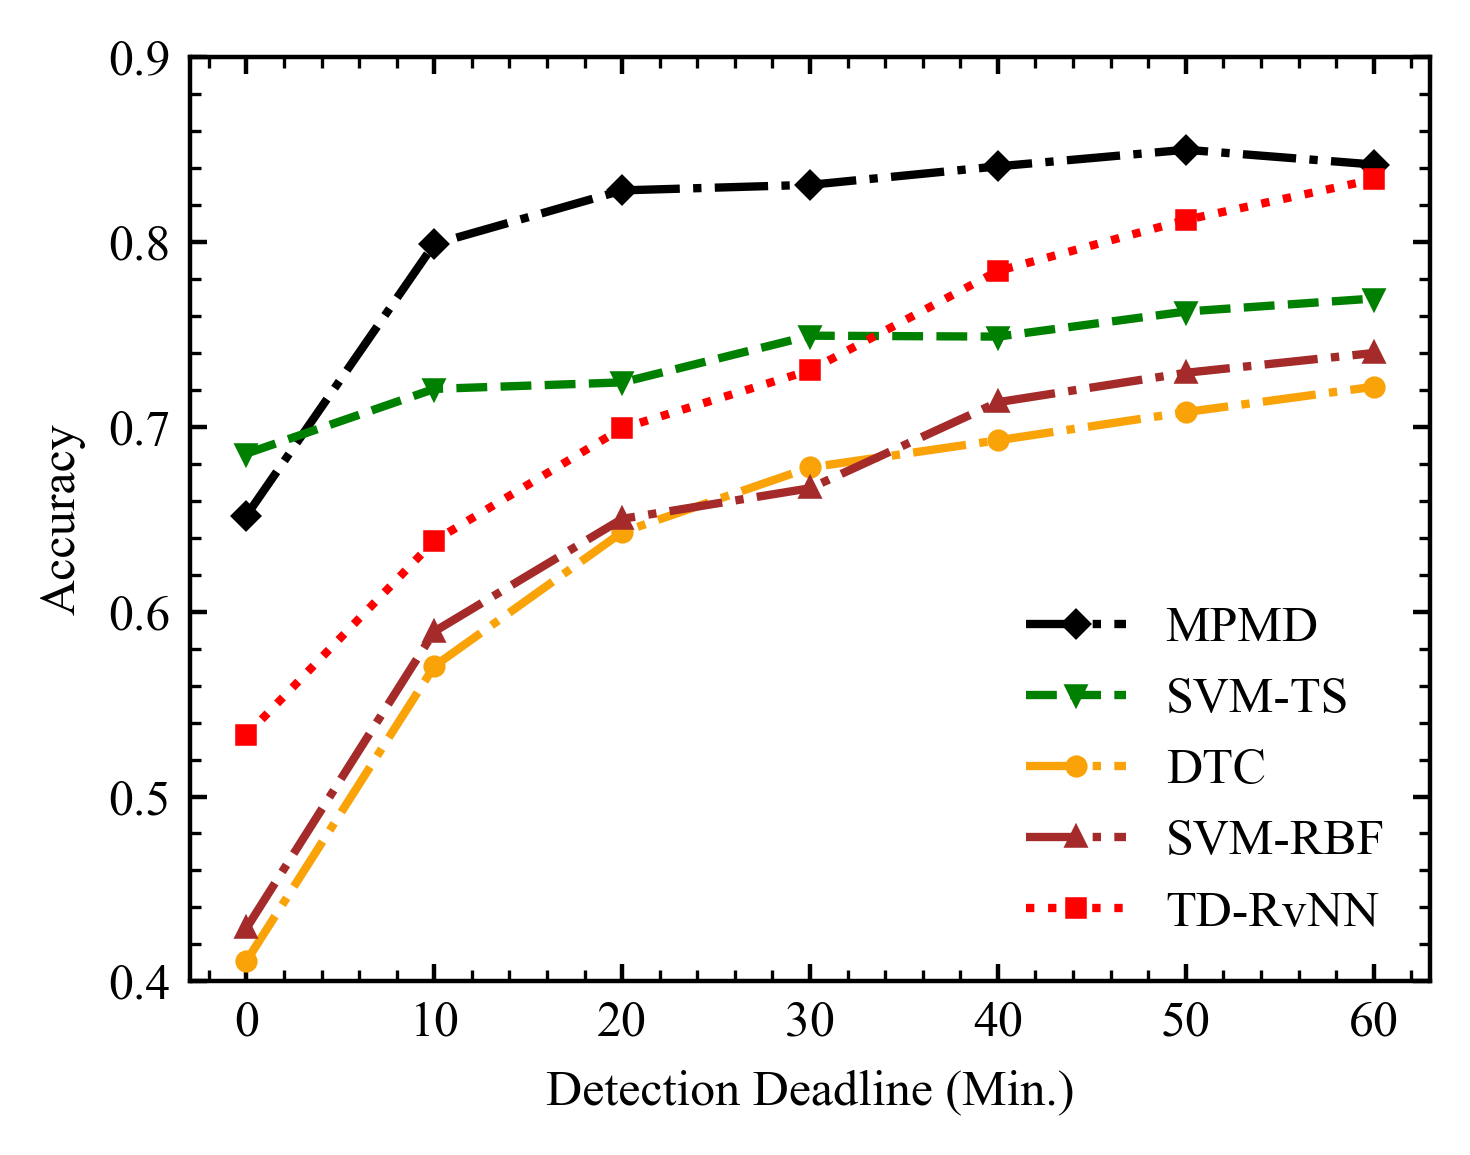

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['Times New Roman']  # 设置字体
plt.rcParams['axes.unicode_minus']=False  # 正常显示负号

# 读取 CSV 文件
file_path = r'C:\Users\Administrator\Desktop\小论文-修改意见\早期检测性能.csv'  
data = pd.read_csv(file_path)

# 提取 x 和 y 值
x_values = data.iloc[:, 0]
y_values = data.iloc[:, 1:]

# 绘图
fig, ax = plt.subplots(figsize=(4, 3), dpi=400)

# 每个列进行绘图，增加 zorder 确保折线显示在最前层
ax.plot(x_values, y_values.iloc[:, 4], label='MPMD', color='black', linestyle='-.', marker='D', markersize=3, zorder=3)
ax.plot(x_values, y_values.iloc[:, 1], label='SVM-TS', color='green', linestyle='--', marker='v', markersize=3, zorder=3)
ax.plot(x_values, y_values.iloc[:, 0], label='DTC', color='#faa308', linestyle='-.', marker='o', markersize=3, zorder=3)
ax.plot(x_values, y_values.iloc[:, 3], label='SVM-RBF', color='brown', linestyle='-.', marker='^', markersize=3, zorder=3)
ax.plot(x_values, y_values.iloc[:, 2], label='TD-RvNN', color='red', linestyle=':', marker='s', markersize=3, zorder=3)

# 设置 x 和 y 轴标签
ax.set_xlabel('Detection Deadline (Min.)', fontsize=9)
ax.set_ylabel('Accuracy', fontsize=9)

# 设置 y 轴范围
ax.set_ylim(0.4, 0.9)

# 设置刻度大小
ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=7)

# 打开次要刻度
ax.minorticks_on()

# 设置 x 轴和 y 轴的次刻度线
ax.tick_params(which='minor', length=2, color='black', direction="in")  # 小刻度线长度
ax.tick_params(which='major', length=3, color='black', direction="in")  # 主刻度线长度

ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.yaxis.set_ticks_position('both')  # 在左右显示刻度
ax.xaxis.set_ticks_position('both')  # 在上下显示刻度

# 设置图例并去掉图例框线
ax.legend(frameon=False, fontsize=9)

# 保存图像
plt.savefig(r'Fig9 Accuracy comparison of representative models for early fake news detection on the Weibo dataset.pdf', dpi=400, format='pdf')

plt.show()


In [11]:
count = 0
list_h =[60,600,1200,1800,2400,3000,3600]
for b in list_h:
    count = count + 1
    print(count)
    path6 = 'E:/大论文/微博/新数据集/real/'
    path_list6=os.listdir(path6)
    list2 = []
    for filename in path_list6:
        path_csv6 = os.path.join(path6,filename)
        df1 = pd.read_csv(path_csv6)
        df = df1[1:]
        df = df[df['时刻'] <= b]
        G = nx.from_pandas_edgelist(df, 'parent', 'mid' ,create_using=nx.DiGraph())
        if G.number_of_nodes() == 0:
            continue
        max_width = max([len(list(G.neighbors(node))) for node in G.nodes()]) - 1
        list2.append([filename[1:-4],
                          motif3_1(G), motif3_2(G), 
                          motif4_1(G), motif4_2(G), 
                          motif4_3(G), motif4_4(G),
                          motif5_1(G), motif5_2(G), 
                          motif5_3(G), motif5_4(G), 
                          motif5_5(G), motif5_6(G), 
                          motif5_7(G), motif5_8(G), motif5_9(G)])
        
        name = ['id', 'm3_1', 'm3_2', 'm4_1', 'm4_2', 'm4_3', 'm4_4',
                        'm5_1', 'm5_2', 'm5_3', 'm5_4', 'm5_5', 'm5_6', 'm5_7', 'm5_8', 'm5_9']
        test1 = pd.DataFrame(columns = name, data = list2)
        test1.to_csv('C:/Users/Administrator/Desktop/小论文-修改意见/weibo前2小时的模体分布/real/'+str(b)+'.csv', encoding='utf-8')


count = 0

list_h =[60,600,1200,1800,2400,3000,3600]
for b in list_h:
    count = count + 1
    print(count)
    path6 = 'E:/大论文/微博/新数据集/fake/'
    path_list6=os.listdir(path6)
    list2 = []
    for filename in path_list6:
        path_csv6 = os.path.join(path6,filename)
        df1 = pd.read_csv(path_csv6)
        df = df1[1:]
        df = df[df['时刻'] <= b]
        G = nx.from_pandas_edgelist(df, 'parent', 'mid' ,create_using=nx.DiGraph())
        if G.number_of_nodes() == 0:
            continue
        max_width = max([len(list(G.neighbors(node))) for node in G.nodes()]) - 1
        list2.append([filename[1:-4],
                          motif3_1(G), motif3_2(G), 
                          motif4_1(G), motif4_2(G), 
                          motif4_3(G), motif4_4(G),
                          motif5_1(G), motif5_2(G), 
                          motif5_3(G), motif5_4(G), 
                          motif5_5(G), motif5_6(G), 
                          motif5_7(G), motif5_8(G), motif5_9(G)])
        
        name = ['id', 'm3_1', 'm3_2', 'm4_1', 'm4_2', 'm4_3', 'm4_4',
                        'm5_1', 'm5_2', 'm5_3', 'm5_4', 'm5_5', 'm5_6', 'm5_7', 'm5_8', 'm5_9']
        test1 = pd.DataFrame(columns = name, data = list2)
        test1.to_csv('C:/Users/Administrator/Desktop/小论文-修改意见/weibo前2小时的模体分布/fake/'+str(b)+'.csv', encoding='utf-8')

1
2
3
4
5
6
7
1
2
3
4
5
6
7


In [31]:
%%time
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import warnings

warnings.filterwarnings('ignore')

# 加载数据
r = pd.read_csv(r'C:\Users\Administrator\Desktop\小论文-修改意见\weibo前2小时的模体分布\fake\3600.csv')
t = pd.read_csv(r'C:\Users\Administrator\Desktop\小论文-修改意见\weibo前2小时的模体分布\real\3600.csv')
r['label'] = 1
t['label'] = 0
df = pd.concat([t, r], ignore_index=True)

# 特征归一化
df1 = df.iloc[:, 2:-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df7 = df1[['m3_1', 'm3_2', 'm4_1', 'm4_2', 
           'm4_3', 'm4_4']]
label = df['label']

# 初始化结果列表
results = []

# 多轮实验
for iteration in range(20):
    print(f'---------- Iteration {iteration+1} ----------')
    
    # 划分训练与测试集
    train_x, test_x, train_y, test_y = train_test_split(df7, label, test_size=0.2, stratify=label, random_state=iteration)

    # 不做过采样，直接用原始训练集计算 scale_pos_weight
    scale_weight = train_y.value_counts()[0] / train_y.value_counts()[1]

    # 超参数网格
    param_grid = {
        'n_estimators': [100, 150],
        'max_depth': [5, 10],
        'min_child_weight': [2, 4],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 1.0],
        'reg_lambda': [0.1, 1.0]
    }

    xgb_model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_weight
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=iteration)

    grid = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )

    grid.fit(train_x, train_y)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(test_x)

    results.append({
        'Iteration': iteration + 1,
        'Accuracy': round(accuracy_score(test_y, y_pred), 3),
        'Recall': round(recall_score(test_y, y_pred), 3),
        'F1 Score': round(f1_score(test_y, y_pred), 3),
        'Precision': round(precision_score(test_y, y_pred), 3),
        'Best Params': grid.best_params_
    })

# 保存结果
results_df = pd.DataFrame(results)
results_df.to_csv(r'C:\Users\Administrator\Desktop\小论文-修改意见\weibo前2小时的模体分布\3600.csv', index=False)


---------- Iteration 1 ----------
---------- Iteration 2 ----------
---------- Iteration 3 ----------
---------- Iteration 4 ----------
---------- Iteration 5 ----------
---------- Iteration 6 ----------
---------- Iteration 7 ----------
---------- Iteration 8 ----------
---------- Iteration 9 ----------
---------- Iteration 10 ----------
---------- Iteration 11 ----------
---------- Iteration 12 ----------
---------- Iteration 13 ----------
---------- Iteration 14 ----------
---------- Iteration 15 ----------
---------- Iteration 16 ----------
---------- Iteration 17 ----------
---------- Iteration 18 ----------
---------- Iteration 19 ----------
---------- Iteration 20 ----------
CPU times: total: 41 s
Wall time: 53 s


In [39]:
import os
import pandas as pd

# 设定目标文件夹路径
folder_path = r'C:\Users\Administrator\Desktop\小论文-修改意见\weibo前2小时的模体分布\real'

# 初始化结果列表
results = []

# 遍历所有 csv 文件
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)

        # 计算非零均值
        m3_1_mean = df['m3_1'][df['m3_1'] != 0].mean()
        m3_2_mean = df['m3_2'][df['m3_2'] != 0].mean()

        results.append({
            'filename': file_name,
            'm3_1_nonzero_mean': m3_1_mean,
            'm3_2_nonzero_mean': m3_2_mean
        })

# 结果保存为 DataFrame 并写入新文件
result_df = pd.DataFrame(results)
output_path = os.path.join(folder_path, r'C:\Users\Administrator\Desktop\小论文-修改意见\weibo前2小时的模体分布\real.csv')
result_df.to_csv(output_path, index=False)

print(f"处理完成，结果保存至：{output_path}")


处理完成，结果保存至：C:\Users\Administrator\Desktop\小论文-修改意见\weibo前2小时的模体分布\real.csv


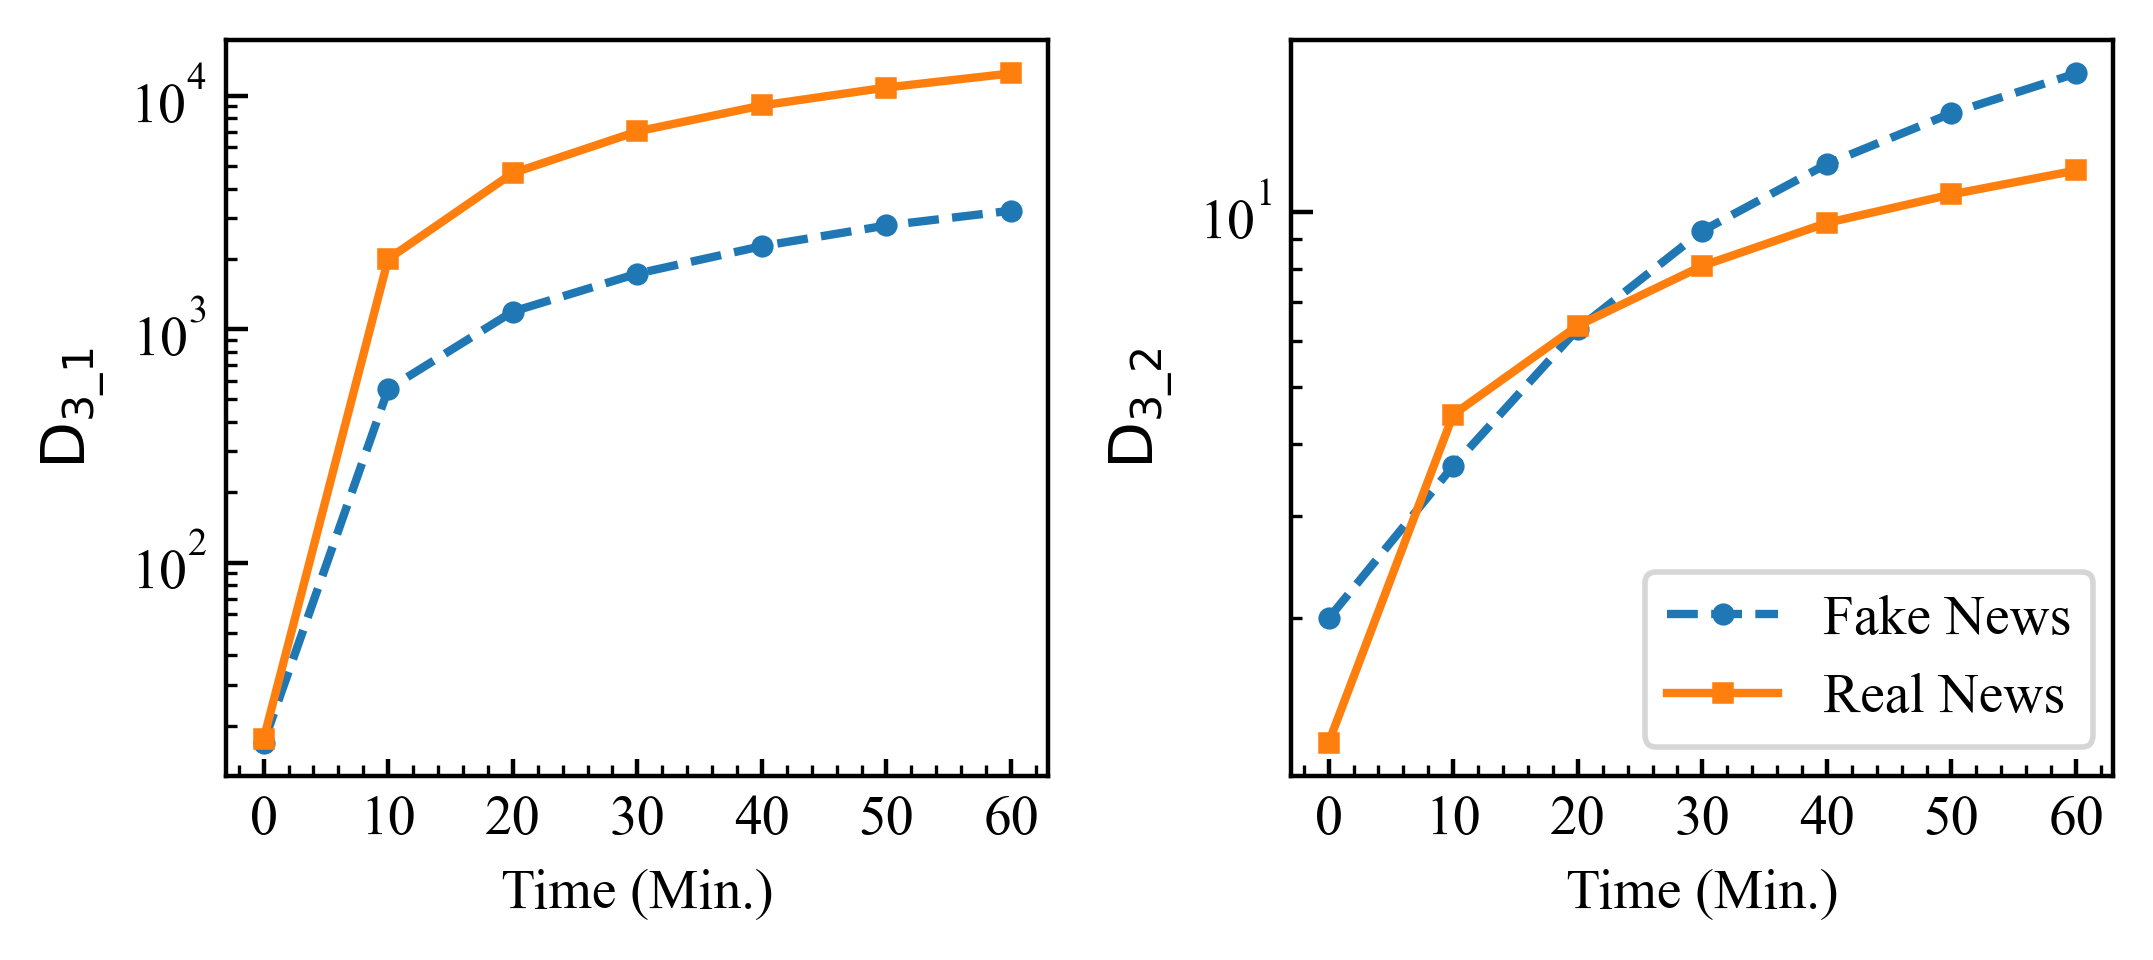

In [11]:
import matplotlib.ticker as ticker
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
rumor = pd.read_csv(r'C:\Users\Administrator\Desktop\小论文-修改意见\weibo前2小时的模体分布\fake.csv')
true = pd.read_csv(r'C:\Users\Administrator\Desktop\小论文-修改意见\weibo前2小时的模体分布\real.csv')

# 创建图像
fig = plt.figure(figsize=(5.5, 2.5), dpi=400)

# 子图1
ax1 = fig.add_subplot(1, 2, 1)
ax1.tick_params(labelsize=10)

x = [0, 10, 20, 30, 40, 50, 60]
y1 = rumor['m3_1']
y2 = true['m3_1']
l1, = ax1.plot(x, y1, linewidth=1.5, marker='o', linestyle='--', markersize=3)
l2, = ax1.plot(x, y2, linewidth=1.5, marker='s', linestyle='-', markersize=3)
ax1.set_xlabel('Time (Min.)', fontsize=10, family='Times New Roman')
ax1.set_ylabel(r'$\mathrm{D_{3\_1}}$', fontsize=11, family='Times New Roman')
ax1.set_yscale('log')

# 设置主刻度和次刻度线的长度，并且方向朝里
ax1.tick_params(axis='x', which='major', direction='in', length=3)  # 主刻度线长度为 8
ax1.tick_params(axis='x', which='minor', direction='in', length=2)  # 次刻度线长度为 4
ax1.tick_params(axis='y', which='major', direction='in', length=4)
ax1.tick_params(axis='y', which='minor', direction='in', length=2)

# ax1.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
# ax1.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=20))
ax1.xaxis.set_major_locator(MultipleLocator(base=10))

# 设置次刻度为更细的线性分布，例如每隔 2 一个次刻度
ax1.xaxis.set_minor_locator(MultipleLocator(base=2))
# 子图2
ax2 = fig.add_subplot(1, 2, 2)
ax2.tick_params(labelsize=10)

y1 = rumor['m3_2']
y2 = true['m3_2']
l1, = ax2.plot(x, y1, linewidth=1.5, marker='o', linestyle='--', markersize=3)
l2, = ax2.plot(x, y2, linewidth=1.5, marker='s', linestyle='-', markersize=3)
ax2.set_xlabel('Time (Min.)', fontsize=10, family='Times New Roman')
ax2.set_ylabel(r'$\mathrm{D_{3\_2}}$', fontsize=11, family='Times New Roman')
ax2.set_yscale('log')

# 设置主刻度和次刻度线的长度，并且方向朝里
ax2.tick_params(axis='x', which='major', direction='in', length=3)  # 主刻度线长度为 8
ax2.tick_params(axis='x', which='minor', direction='in', length=2)  # 次刻度线长度为 4
ax2.tick_params(axis='y', which='major', direction='in', length=4)
ax2.tick_params(axis='y', which='minor', direction='in', length=2)

# ax2.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
# ax2.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=20))
ax2.xaxis.set_major_locator(MultipleLocator(base=10))

# 设置次刻度为更细的线性分布，例如每隔 2 一个次刻度
ax2.xaxis.set_minor_locator(MultipleLocator(base=2))
# 为 x 轴和 y 轴设置次刻度
ax1.minorticks_on()
ax2.minorticks_on()

# 设置图例
plt.legend(handles=[l1, l2], labels=['Fake News', 'Real News'], loc=(0.43, 0.04),
           prop={'family': 'Times New Roman', 'size': 10}, ncol=1)

# 设置子图间距
plt.tight_layout()
# plt.subplots_adjust(wspace=0.6)
plt.savefig(r'Fig8 Changes in breadth and depth motif degrees for real and fake news in early propagation.pdf', dpi=400, format='pdf')

# 显示图像
plt.show()
